## Reinforcement Learning Control for HVAC systems

Contributors:
* 16010121801 (DANISH MOHAMMED ANSARI)
* 16010121810 (SOHAM PATIL)
* 16010121812 (UMESH RAVAL)
* 16010121825 (VIVEK VISHWAKARMA)
* 16010121827 (DHRUV GOYAL)

In this small-scale implementation of Reinforcement Learning Control for HVAC (Heating, Ventilation, and Air Conditioning) systems, we have created a versatile framework with three distinct environments, each for different considerations like for turning off the systems entirely for energy efficiency or for exploring the trade-offs between comfort and energy conservation.

Within this framework, we have integrated two fundamental reinforcement learning algorithms to tackle the control problem: Q-Learning and Monte Carlo methods. These approaches enable the system to learn and adapt, optimizing its decision-making process by mapping state-action pairs to the expected returns.

In essence, this implementation empowers the HVAC system to become more intelligent and efficient in its operation, taking into account various energy-saving strategies while maintaining occupant comfort.

In [ ]:
import numpy as np

#HVAC Environment with defined functions involving
#reset(), step(), _simulate_hvac_effects(), _get_mode()

class HVACEnvironment:
    def __init__(self):
        # Environment parameters
        self.initial_temperature = 25.0
        self.initial_humidity = 50.0
        self.fixed_occupancy_level = 1  # Initial occupancy level (0 for low, 1 for medium, 2 for high)

        self.current_temperature = self.initial_temperature
        self.current_humidity = self.initial_humidity

        # Reward parameters
        self.setpoint_temperature = 22.0

        # HVAC system modes
        self.ac_mode = "Balanced"  # Initial AC mode
        self.heating_mode = "Balanced"  # Initial heating mode
        self.ventilation_mode = "Balanced"  # Initial ventilation mode

        # Watts consumed
        self.current_watts = 0.0

    def reset(self):
        # Reset the environment to its initial state
        self.current_temperature = self.initial_temperature
        self.current_humidity = self.initial_humidity
        self.current_watts = 0.0
        self.fixed_occupancy_level = 1

        return [round(self.current_temperature, 4), round(self.current_humidity, 4),round(self.current_watts, 4),self.fixed_occupancy_level]

    def step(self, ac_action, heating_action, ventilation_action):
        # Take a step in the environment based on the agent's actions
        self.current_watts = 0.0
        # Update HVAC system modes
        self.ac_mode = self._get_mode(ac_action, self.ac_mode)
        self.heating_mode = self._get_mode(heating_action, self.heating_mode)
        self.ventilation_mode = self._get_mode(ventilation_action, self.ventilation_mode)

        # Simulate the effect of HVAC system modes on the environment
        self._simulate_hvac_effects()

        # Calculate the reward based on how close the temperature is to the setpoint and penalize high energy consumption
        reward = -abs(self.current_temperature - self.setpoint_temperature) / 100.0 - self.current_watts / 100.0

        # Check if the temperature is within an acceptable range for comfort
        done = not (20.0 <= self.current_temperature <= 24.0)

        # Return the new state, reward, whether the episode is done, and additional information
        next_state = [round(self.current_temperature, 4), round(self.current_humidity, 4),round(self.current_watts, 4),self.fixed_occupancy_level]
        return next_state, round(reward, 4), done

    def _simulate_hvac_effects(self):
        # Simulate the effects of HVAC system modes on the environment
        # This is a simple simulation, and in a real-world scenario, more sophisticated models may be used

        # Example: Temperature adjustment based on HVAC system modes
        if self.ac_mode == "Eco":
            self.current_temperature -= 0.5
            self.current_watts += 5.0  # Simulate lower energy consumption for Eco mode
        elif self.ac_mode == "Balanced":
            self.current_temperature -= 1
            self.current_watts+= 10.0
        elif self.ac_mode == "High Performance":
            self.current_temperature -= 1.5
            self.current_watts+= 15.0  # Simulate higher energy consumption for High Performance mode

        if self.heating_mode == "Eco":
            self.current_temperature += 0.5
            self.current_watts += 5.0  # Simulate lower energy consumption for Eco mode
        elif self.heating_mode == "Balanced":
            self.current_temperature += 1
            self.current_watts+= 10.0
        elif self.heating_mode == "High Performance":
            self.current_temperature += 1.5
            self.current_watts += 15.0  # Simulate higher energy consumption for High Performance mode

        if self.ventilation_mode == "Eco":
            self.current_humidity += 0.5
            self.current_watts += 5.0  # Simulate lower energy consumption for Eco mode
        elif self.ventilation_mode == "Balanced":
            self.current_humidity += 1
            self.current_watts+= 10.0
        elif self.ventilation_mode == "High Performance":
            self.current_humidity += 1.5
            self.current_watts += 15.0  # Simulate higher energy consumption for High Performance mode

        # Adjust temperature based on fixed staff occupancy level
        if self.fixed_occupancy_level == 0:  # Low occupancy
            self.current_temperature += 0.1
        elif self.fixed_occupancy_level == 2:  # High occupancy
            self.current_temperature += 0.3
        # Medium occupancy has no additional temperature adjustment

        # Adjust humidity based on fixed staff occupancy level
        if self.fixed_occupancy_level == 0:  # Low occupancy
            self.current_humidity -= 1.0
        elif self.fixed_occupancy_level == 2:  # High occupancy
            self.current_humidity += 1.0
        # Medium occupancy has no additional humidity adjustment

        # Clip temperature and humidity to reasonable ranges
        self.current_temperature = np.clip(self.current_temperature, 15.0, 30.0)
        self.current_humidity = np.clip(self.current_humidity, 0.0, 100.0)
        # change occupancy randomly
        self.fixed_occupancy_level = int(np.random.choice([0.0, 1.0,2.0]))  # Simulating random occupancy changes

    def _get_mode(self, action, current_mode):
        # Helper function to map action to HVAC system mode
        if action == 0:
            return "Eco"
        elif action == 1:
            return "Balanced"
        elif action == 2:
            return "High Performance"
        else:
            return current_mode

# Example usage:
env = HVACEnvironment()

# Reset the environment to its initial state
state = env.reset()
print("Initial State:")
print(f"Temperature: {state[0]} (in degrees Celsius) - Initial temperature of the environment.")
print(f"Humidity: {state[1]} (percentage) - Initial humidity level in the environment.")
print(f"Occupancy Level: {state[2]} (0 for low, 1 for medium, 2 for high) - Initial occupancy level.")
print(f"Watts Consumed: {state[3]} (in watts) - Initial energy consumption in the environment.")

# Take 500 steps in the environment
for step in range(500):
    ac_action = np.random.choice([0, 1, 2])
    heating_action = np.random.choice([0, 1, 2])
    ventilation_action = np.random.choice([0, 1, 2])

    next_state, reward, done = env.step(ac_action, heating_action, ventilation_action)

    # Print detailed information about the state every 10 steps
    if step % 10 == 0:
        print(f"\nStep: {step}")
        print(f"AC Mode: {env.ac_mode}, Heating Mode: {env.heating_mode}, Ventilation Mode: {env.ventilation_mode}")
        print(f"Next State:")
        print(f"  Temperature: {next_state[0]} (in degrees Celsius)")
        print(f"  Humidity: {next_state[1]} (percentage)")
        print(f"  Occupancy Level: {next_state[3]} (0 for low, 1 for medium, 2 for high)")
        print(f"  Watts Consumed: {next_state[2]} (in watts)")
        print(f"Reward: {reward}, Done: {done}")

Initial State:
Temperature: 25.0 (in degrees Celsius) - Initial temperature of the environment.
Humidity: 50.0 (percentage) - Initial humidity level in the environment.
Occupancy Level: 0.0 (0 for low, 1 for medium, 2 for high) - Initial occupancy level.
Watts Consumed: 1 (in watts) - Initial energy consumption in the environment.

Step: 0
AC Mode: Balanced, Heating Mode: High Performance, Ventilation Mode: Balanced
Next State:
  Temperature: 25.5 (in degrees Celsius)
  Humidity: 51.0 (percentage)
  Occupancy Level: 2 (0 for low, 1 for medium, 2 for high)
  Watts Consumed: 35.0 (in watts)
Reward: -0.385, Done: True

Step: 10
AC Mode: Eco, Heating Mode: Balanced, Ventilation Mode: High Performance
Next State:
  Temperature: 26.4 (in degrees Celsius)
  Humidity: 61.0 (percentage)
  Occupancy Level: 1 (0 for low, 1 for medium, 2 for high)
  Watts Consumed: 30.0 (in watts)
Reward: -0.344, Done: True

Step: 20
AC Mode: High Performance, Heating Mode: Balanced, Ventilation Mode: Eco
Next Sta

Episode 10/10000
Episode 20/10000
Episode 30/10000
Episode 40/10000
Episode 50/10000
Episode 60/10000
Episode 70/10000
Episode 80/10000
Episode 90/10000
Episode 100/10000
Episode 110/10000
Episode 120/10000
Episode 130/10000
Episode 140/10000
Episode 150/10000
Episode 160/10000
Episode 170/10000
Episode 180/10000
Episode 190/10000
Episode 200/10000
Episode 210/10000
Episode 220/10000
Episode 230/10000
Episode 240/10000
Episode 250/10000
Episode 260/10000
Episode 270/10000
Episode 280/10000
Episode 290/10000
Episode 300/10000
Episode 310/10000
Episode 320/10000
Episode 330/10000
Episode 340/10000
Episode 350/10000
Episode 360/10000
Episode 370/10000
Episode 380/10000
Episode 390/10000
Episode 400/10000
Episode 410/10000
Episode 420/10000
Episode 430/10000
Episode 440/10000
Episode 450/10000
Episode 460/10000
Episode 470/10000
Episode 480/10000
Episode 490/10000
Episode 500/10000
Episode 510/10000
Episode 520/10000
Episode 530/10000
Episode 540/10000
Episode 550/10000
Episode 560/10000
E

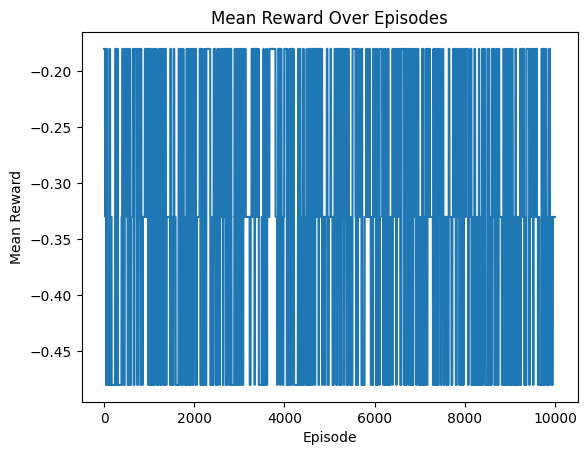

In [ ]:
import matplotlib.pyplot as plt

#Class of QLearningAgent
# discrete_state(), choose_action(), update_q_table(), train_q_learning_agent()

class QLearningAgent:
    def __init__(self, num_actions, state_space, learning_rate=0.1, discount_factor=0.9, epsilon=0.1):
        self.num_actions = num_actions
        self.state_space = state_space
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.epsilon = epsilon

        # Initialize the Q-table with zeros
        self.q_table = np.zeros((len(state_space), num_actions))

        # Create a state mapping to convert states to indices
        self.state_mapping = {state: idx for idx, state in enumerate(state_space)}

    def discretize_state(self, state):
        # Discretize the continuous state variables (temperature, humidity)
        temperature, humidity, energy, occupancy = state
        temp_bins = np.linspace(15, 30, 16)  # 16 temperature bins
        humidity_bins = np.linspace(0, 100, 21)  # 21 humidity bins

        temp_bin = np.digitize(temperature, temp_bins) - 1
        humidity_bin = np.digitize(humidity, humidity_bins) - 1

        # Ensure that the discretized state is within the bounds of the state_space
        temp_bin = np.clip(temp_bin, 0, len(temp_bins) - 1)
        humidity_bin = np.clip(humidity_bin, 0, len(humidity_bins) - 1)

        return temp_bin, humidity_bin, energy, occupancy

    def choose_action(self, state):
        # Discretize the state
        state = self.discretize_state(state)

        # Exploration vs. Exploitation trade-off
        if np.random.rand() < self.epsilon:
            # Explore: choose a random action
            return np.random.choice(self.num_actions)
        else:
            # Exploit: choose the action with the highest Q-value for the current state
            state_idx = self.state_mapping.get(state)
            return np.argmax(self.q_table[state_idx, :])

    def update_q_table(self, state, action, reward, next_state):
        state = self.discretize_state(state)
        next_state = self.discretize_state(next_state)

        state_idx = self.state_mapping.get(state)
        next_state_idx = self.state_mapping.get(next_state)

        # Update Q-value using the Q-learning update rule
        self.q_table[state_idx, action] = (1 - self.learning_rate) * self.q_table[state_idx, action] + \
                                          self.learning_rate * (reward + self.discount_factor * np.max(self.q_table[next_state_idx, :]))

def train_q_learning_agent(agent, environment, num_episodes):
    mean_rewards = []
    for episode in range(num_episodes):
        state = environment.reset()
        done = False
        episode_rewards = 0

        while not done:
            # Choose an action based on the Q-learning agent's policy
            action = agent.choose_action(state)

            # Take the chosen action in the environment
            next_state, reward, done = environment.step(action, action, action)

            # Update the Q-table
            agent.update_q_table(state, action, reward, next_state)

            state = next_state
            episode_rewards += reward

        mean_rewards.append(episode_rewards)

        if (episode + 1) % 10 == 0:
            print(f"Episode {episode + 1}/{num_episodes}")

    return mean_rewards

if __name__ == "__main__":
    # Create the HVAC environment
    env = HVACEnvironment()

    # Define the state space (combining temperature, humidity, energy consumption, and occupancy level)
    state_space = [(temp, humidity, watts, occupancy) for temp in range(15, 31)
                   for humidity in range(0, 101)
                   for watts in [0, 5, 10, 15]
                   for occupancy in [0, 1, 2]]

    # Create a Q-learning agent
    num_actions = 3  # AC, Heating, and Ventilation modes
    agent = QLearningAgent(num_actions, state_space)

    # Train the Q-learning agent
    num_episodes = 10000
    mean_rewards = train_q_learning_agent(agent, env, num_episodes)

    plt.plot(range(1, num_episodes + 1), mean_rewards)
    plt.xlabel("Episode")
    plt.ylabel("Mean Reward")
    plt.title("Mean Reward Over Episodes")
    plt.show()

In [ ]:
import random

# Define a class for simulating an HVAC (Heating, Ventilation, and Air Conditioning) environment.
class HVACEnvironment:
    def __init__(self, initial_temperature=25.0, initial_occupancy="low"):
        # Initialize the HVAC environment with initial temperature and occupancy levels.
        self.temperature = initial_temperature
        self.occupancy = initial_occupancy
        self.heating_mode = "off"  # Initialize heating mode to "off"
        self.ventilation_mode = "off"  # Initialize ventilation mode to "off"
        self.ac_mode = "off"  # Initialize AC mode to "off"
        self.power_consumed = 0.0

    # Set the current temperature of the environment.
    def set_temperature(self, temperature):
        self.temperature = temperature

    # Set the current occupancy level of the environment.
    def set_occupancy(self, occupancy):
        self.occupancy = occupancy

    # Simulate the heating component of the HVAC system based on the chosen mode.
    def heating(self, mode):
        if mode == "eco":
            power = 100
        elif mode == "performance":
            power = 450
        else:
            power = 0  # Off mode

        self.power_consumed += power
        self.temperature += 0.01 * power

    # Simulate the ventilation component of the HVAC system based on the chosen mode.
    def ventilation(self, mode):
        if mode == "eco":
            power = random.uniform(50, 150)
        elif mode == "performance":
            power = random.uniform(150, 250)
        else:
            power = 0  # Off mode

        self.power_consumed += power

    # Simulate the AC (Air Conditioning) component of the HVAC system based on the chosen mode.
    def ac(self, mode):
        if mode == "eco":
            power = 100
        elif mode == "performance":
            power = 450
        else:
            power = 0  # Off mode

        self.power_consumed += power
        self.temperature -= 0.1 * power
        if self.temperature < 0:
            self.temperature = 0

    # Calculate the reward based on the difference between the current temperature and a target temperature, as well as power consumption.
    def calculate_reward(self, target_temperature=22.0):
        temp_diff = abs(self.temperature - target_temperature)
        if temp_diff != 0:
            temp_diff = -(temp_diff)
        return temp_diff - 0.001 * self.power_consumed

    # Simulate a single time step in the HVAC environment, adjusting parameters and calculating the reward.
    def step(self, heating_mode, ac_mode):
        self.power_consumed = 0.0
        self.heating_mode = heating_mode
        self.ventilation_mode = "off"
        self.ac_mode = ac_mode

        # Simulate changes in occupancy levels with a 20% probability.
        if random.random() < 0.2:
            self.occupancy = random.choice(["low", "medium", "high"])

        # Adjust temperature based on occupancy levels.
        if self.occupancy == "low":
            self.temperature += random.uniform(-0.5, 0.5)
        elif self.occupancy == "medium":
            self.temperature += random.uniform(0.5, 1.0)
        elif self.occupancy == "high":
            self.temperature += random.uniform(1.0, 1.5)

        # Introduce random temperature changes.
        self.temperature += random.uniform(0, 3)
        reward = self.calculate_reward()

        return self.temperature, self.occupancy, self.power_consumed, reward

if __name__ == "__main__":
    # Initialize the HVAC environment.
    hvac = HVACEnvironment()

    # Run the simulation for 10 time steps, randomly choosing heating, ventilation, and AC modes.
    for step in range(10):
        heating_mode = random.choice(["off", "eco", "performance"])
        ventilation_mode = random.choice(["off", "eco", "performance"])
        ac_mode = random.choice(["off", "eco", "performance"])

        # Simulate a single time step and print the results.
        temperature, occupancy, power_consumed, reward = hvac.step(heating_mode, ac_mode)
        print(f"Step {step + 1}: Heating Mode: {heating_mode}, Ventilation Mode: {ventilation_mode}, AC Mode: {ac_mode}, Temperature: {temperature:.2f}°C, Occupancy: {occupancy}, Power Consumed: {power_consumed:.2f} watts, Reward: {reward:.2f}")


Step 1: Heating Mode: eco, Ventilation Mode: performance, AC Mode: eco, Temperature: 19.09°C, Occupancy: low, Power Consumed: 378.28 watts, Reward: -3.29
Step 2: Heating Mode: performance, Ventilation Mode: eco, AC Mode: performance, Temperature: 1.13°C, Occupancy: low, Power Consumed: 952.63 watts, Reward: -21.82
Step 3: Heating Mode: performance, Ventilation Mode: off, AC Mode: eco, Temperature: 0.50°C, Occupancy: low, Power Consumed: 550.00 watts, Reward: -22.05
Step 4: Heating Mode: eco, Ventilation Mode: off, AC Mode: off, Temperature: 2.92°C, Occupancy: low, Power Consumed: 100.00 watts, Reward: -19.18
Step 5: Heating Mode: eco, Ventilation Mode: off, AC Mode: off, Temperature: 6.62°C, Occupancy: low, Power Consumed: 100.00 watts, Reward: -15.48
Step 6: Heating Mode: off, Ventilation Mode: eco, AC Mode: off, Temperature: 7.90°C, Occupancy: low, Power Consumed: 126.06 watts, Reward: -14.22
Step 7: Heating Mode: eco, Ventilation Mode: eco, AC Mode: off, Temperature: 11.38°C, Occupa

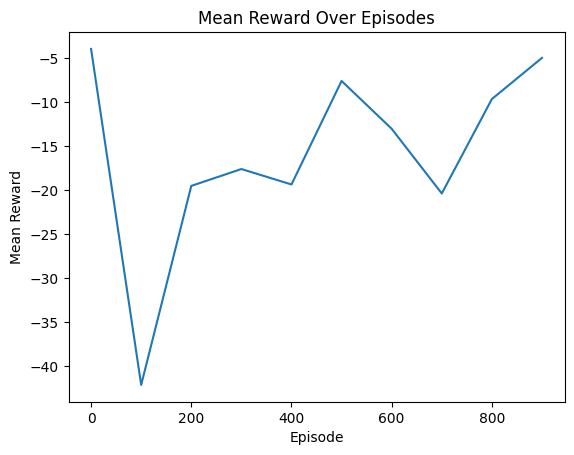

In [ ]:
class HVACAgent:
    def __init__(self, num_states, num_actions, alpha=0.5, gamma=0.95, epsilon=0.1):
        # Initialize the HVAC agent with a Q-table, learning parameters, and action parameters
        self.q_table = np.zeros((num_states, num_states, num_actions)  # Added an extra dimension for occupancy
        self.alpha = alpha  # Learning rate
        self.gamma = gamma  # Discount factor
        self.epsilon = epsilon  # Epsilon-greedy exploration rate

    def choose_action(self, state):
        # Choose an action based on the epsilon-greedy policy
        if np.random.uniform(0, 1) < self.epsilon:
            action = np.random.choice(num_actions)  # Explore the action space
        else:
            action = np.argmax(self.q_table[state[0]][state[1]])  # Exploit learned values
        return action

    def update_q_table(self, state, action, reward, next_state):
        # Update the Q-table based on the Bellman equation
        old_value = self.q_table[state[0]][state[1]][action]
        next_max = np.max(self.q_table[next_state[0]][next_state[1])

        new_value = (1 - self.alpha) * old_value + self.alpha * (reward + self.gamma * next_max)
        self.q_table[state[0]][state[1]][action] = new_value

action_mapping = {(0, 0): ("off", "off"), (0, 1): ("off", "eco"), (0, 2): ("off", "performance"),
                  (1, 0): ("eco", "off"), (1, 1): ("eco", "eco"), (1, 2): ("eco", "performance"),
                  (2, 0): ("performance", "off"), (2, 1): ("performance", "eco"), (2, 2): ("performance", "performance")}

# Initialize the agent with a larger action space
agent = HVACAgent(num_states=100, num_actions=9)  # Adjusted for the new action space
# Initialize the environment and the agent
hvac = HVACEnvironment()

steps = []
rewards = []
# Train the agent
for step in range(1000):

    occupancy_mapping = {"low": 0, "medium": 1, "high": 2}

    # Get the current state based on temperature and occupancy
    state = (min(int(hvac.temperature), 99), occupancy_mapping[hvac.occupancy])

    # Choose an action
    action_index = agent.choose_action(state)
    action = action_mapping[(action_index // 3, action_index % 3)]  # Convert the single index into two indices

    # Perform the action and get the reward
    temperature, occupancy, power_consumed, reward = hvac.step(action[0], action[1])

    # Get the new state after taking the action
    next_state = (min(int(temperature), 99), occupancy_mapping[occupancy])

    if step % 100 == 0:
        steps.append(step)
        rewards.append(reward)

    # Update the Q-table based on the result of the action
    agent.update_q_table(state, action_index, reward, next_state)

plt.plot(steps, rewards)
plt.xlabel("Episode")
plt.ylabel("Mean Reward")
plt.title("Mean Reward Over Episodes")
plt.show()


In [ ]:
hvac = HVACEnvironment()
# Simulate a 100-step execution of the learned policy
for step in range(100):
    # Get current state
    state = (min(int(hvac.temperature), 99), occupancy_mapping[hvac.occupancy])

    # Choose an action based on the learned policy
    action_index = np.argmax(agent.q_table[state[0]][state[1]])
    action = action_mapping[(action_index // 3, action_index % 3)]  # Convert the single index into two indices

    # Perform the action and get the reward
    temperature, occupancy, power_consumed, reward = hvac.step(action[0],action[1])

    print(f"Step {step + 1}: Action: {action}, Temperature: {temperature:.2f}°C, Occupancy: {occupancy}, Power Consumed: {power_consumed:.2f} watts, Reward: {reward:.2f}")

Step 1: Action: ('performance', 'eco'), Temperature: 19.69°C, Occupancy: low, Power Consumed: 550.00 watts, Reward: -2.86
Step 2: Action: ('off', 'off'), Temperature: 20.69°C, Occupancy: low, Power Consumed: 0.00 watts, Reward: -1.31
Step 3: Action: ('off', 'off'), Temperature: 23.39°C, Occupancy: low, Power Consumed: 0.00 watts, Reward: -1.39
Step 4: Action: ('performance', 'eco'), Temperature: 18.16°C, Occupancy: low, Power Consumed: 550.00 watts, Reward: -4.39
Step 5: Action: ('eco', 'off'), Temperature: 21.14°C, Occupancy: low, Power Consumed: 100.00 watts, Reward: -0.96
Step 6: Action: ('off', 'off'), Temperature: 22.06°C, Occupancy: low, Power Consumed: 0.00 watts, Reward: -0.06
Step 7: Action: ('off', 'off'), Temperature: 24.35°C, Occupancy: low, Power Consumed: 0.00 watts, Reward: -2.35
Step 8: Action: ('performance', 'eco'), Temperature: 20.12°C, Occupancy: low, Power Consumed: 550.00 watts, Reward: -2.43
Step 9: Action: ('off', 'off'), Temperature: 23.05°C, Occupancy: low, Po

In [ ]:
import random

class HVACEnvironment():
    def __init__(self):
        # Initialize the HVAC environment with default values
        self.initial_temperature = 30.0
        self.initial_humidity = 50.0
        self.fixed_occupancy_level = 1  # Initial occupancy level (0 for low, 1 for medium, 2 for high)

        self.current_temperature = self.initial_temperature
        self.current_humidity = self.initial_humidity

        # Reward parameters
        self.setpoint_temperature = 22.0

        # HVAC system modes
        self.ac_mode = "Balanced"  # Initial AC mode
        self.heating_mode = "Balanced"  # Initial heating mode
        self.ventilation_mode = "Balanced"  # Initial ventilation mode

        # Watts consumed
        self.current_watts = 0.0

    def reset(self):
        # Reset the environment to its initial state
        self.current_temperature = self.initial_temperature
        self.current_humidity = self.initial_humidity
        self.current_watts = 0.0
        self.fixed_occupancy_level = 1

        return [
            round(self.current_temperature, 1),
            round(self.current_humidity, 1),
            round(self.current_watts, 1),
            self.fixed_occupancy_level
        ]

    def _get_mode(self, action, current_mode):
        # Helper function to map action indices to HVAC system modes
        action_map = {
            0: "Eco",
            1: "Balanced",
            2: "High Performance",
        }

        try:
            return action_map[action]
        except KeyError:
            return current_mode

    def _simulate_hvac_effects(self):
        # Simulate the effects of HVAC system on temperature, humidity, and power consumption

        # AC mode effects
        ac_map = {
            "Eco": (-0.5, 5.0),
            "Balanced": (-1, 10.0),
            "High Performance": (-1.5, 15.0)
        }
        self.current_temperature += ac_map[self.ac_mode][0]
        self.current_watts += ac_map[self.ac_mode][1]

        # Heating mode effects
        heating_map = {
            "Eco": (0.5, 5.0),
            "Balanced": (1, 10.0),
            "High Performance": (1.5, 15.0)
        }
        self.current_temperature += heating_map[self.heating_mode][0]
        self.current_watts += heating_map[self.heating_mode][1]

        # Ventilation mode effects
        ventilation_map = {
            "Eco": (0.5, 5.0),
            "Balanced": (1, 10.0),
            "High Performance": (1.5, 15.0)
        }
        self.current_humidity += ventilation_map[self.ventilation_mode][0]
        self.current_watts += ventilation_map[self.ventilation_mode][1]

        # Occupancy effects
        occupancy_map = {
            0: (-0.1, 0.1, random.randint(7, 9)),
            1: (0, 1, 0),
            2: (0.3, 0.5, random.randint(9, 12))
        }
        self.current_temperature += occupancy_map[self.fixed_occupancy_level][0]
        self.current_humidity *= occupancy_map[self.fixed_occupancy_level][1]
        self.current_humidity += occupancy_map[self.fixed_occupancy_level][2]

        # Clip temperature and humidity to stay within certain bounds
        self.current_temperature = 30.0 if self.current_temperature > 30.0 \
                                else 15.0 if self.current_temperature < 15.0 \
                                else self.current_temperature

        self.current_humidity = 70.0 if self.current_humidity > 70.0 \
                                else 20.0 if self.current_humidity < 20.0 \
                                else self.current_humidity

        # Randomly update the occupancy level
        self.fixed_occupancy_level = int(random.choice([0.0, 1.0, 2.0]))

    def step(self, ac_action, heating_action, ventilation_action):
        # Take a step in the environment based on the provided HVAC system actions

        # Reset power consumption
        self.current_watts = 0.0

        # Update HVAC system modes based on actions
        self.ac_mode = self._get_mode(ac_action, self.ac_mode)
        self.heating_mode = self._get_mode(heating_action, self.heating_mode)
        self.ventilation_mode = self._get_mode(ventilation_action, self.ventilation_mode)

        # Simulate the effects of HVAC on the environment
        self._simulate_hvac_effects()

        # Calculate the reward based on temperature deviation and power consumption
        reward = -abs(self.current_temperature - self.setpoint_temperature) / 100.0 - self.current_watts / 100.0

        # Check if the episode is done (temperature within a comfort range)
        done = (20.0 <= self.current_temperature <= 24.0)

        # Return the new state, reward, episode completion flag, and additional information
        next_state = (round(self.current_temperature, 1), round(self.current_humidity, 1), round(self.current_watts, 1), self.fixed_occupancy_level)
        return next_state, round(reward, 1), done


In [ ]:
env = HVACEnvironment()


In [ ]:
ac_action = 2 #random.choice([2, 1, 2])
heating_action = 2 #random.choice([0, 1, 2])
ventilation_action = 2 #random.choice([0, 1, 2])

next_state, reward, done = env.step(ac_action, heating_action, ventilation_action)

# Print detailed information about the state every 10 steps

print(f"AC Mode: {env.ac_mode}, Heating Mode: {env.heating_mode}, Ventilation Mode: {env.ventilation_mode}")
print(f"Next State:")
print(f"  Temperature: {next_state[0]} (in degrees Celsius)")
print(f"  Humidity: {next_state[1]} (percentage)")
print(f"  Occupancy Level: {next_state[3]} (0 for low, 1 for medium, 2 for high)")
print(f"  Watts Consumed: {next_state[2]} (in watts)")
print(f"Reward: {reward}, Done: {done}")


AC Mode: High Performance, Heating Mode: High Performance, Ventilation Mode: High Performance
Next State:
  Temperature: 30.0 (in degrees Celsius)
  Humidity: 51.5 (percentage)
  Occupancy Level: 0 (0 for low, 1 for medium, 2 for high)
  Watts Consumed: 45.0 (in watts)
Reward: -0.5, Done: False


In [ ]:
ac_action_space = [0, 1, 2]
heatingc_action_space = [0, 1, 2]
ventilation_action_space = [0, 1, 2]

temp_start = 18.0
temp_end = 30.0
temperature_range_length = (temp_end - temp_start)*10 + 1
temperature_range = [round(temp_start + (i * 0.1), 2) for i in range(int(temperature_range_length))]

humidity_start = 20.0
humidity_end = 70.0
humidity_range_length = (humidity_end - humidity_start)*10 + 1
humidity_range = [round(temp_start + (i * 0.1), 2) for i in range(int(humidity_range_length))]

watt_start = 15.0
watt_end = 45.0
# watt_range_length = (watt_end - watt_start)*10 + 1
# watt_range = [round(temp_start + (i * 0.1), 2) for i in range(int(watt_range_length))]
watt_range = [float(i) for i in range(15, 50, 5)]
watt_range.insert(0, 0.0)
occupancy_range = [0, 1, 2]

print(len(temperature_range) * len(humidity_range) * len(watt_range) * len(occupancy_range))

1454904


In [ ]:
# Define empty list to store all possible actions
total_action_space = []

# Iterate over each possible action in the AC action space
for ac in ac_action_space:

    # Iterate over each possible action in the heating action space
    for heating in heatingc_action_space:

        # Iterate over each possible action in the ventilation action space
        for ventilation in ventilation_action_space:

            # Add the current action to the list
            total_action_space.append((ac, heating, ventilation))

# Print the number of total possible actions
print(len(total_action_space))

27


In [ ]:
# Define empty list to store states
states = []

# Iterate over each temperature value in the range
for temperature in temperature_range:

    # Iterate over each humidity value in the range
    for humidity in humidity_range:

        # Iterate over each watt value in the range
        for watt in watt_range:

            # Iterate over each occupancy value in the range
            for occupancy in occupancy_range:

                # Add the current state to the list
                states.append((temperature, humidity, watt, occupancy))

In [ ]:
def initialize_action_value():
    """Initializes the action-value table.

    Returns:
        A dictionary mapping state-action pairs to action values.
    """

    Q = {}

    for state in states:
        for action in total_action_space:
            Q[state, action] = 0 # random.random()

    return Q


def initialize_returns():
    """Initializes the returns table.

    Returns:
        A dictionary mapping state-action pairs to lists of returns.
    """

    returns = {}

    for state in states:
        for action in total_action_space:
            returns[state, action] = [] # random.random()

    return returns


def initialize_policy():
    """Initializes the policy.

    Returns:
        A dictionary mapping states to probability distributions over actions.
    """

    total_action_space_probabilities = [0 for i in range(len(total_action_space))]
    policy = {}

    for state in states:
        policy[state] = total_action_space_probabilities[:] # random.random()

    return policy

In [ ]:
def max_action():
    """Returns the action with the highest expected reward in the current state.

    Returns:
        The action with the highest expected reward.
    """

    max_value = -99999
    max_action = None

    for action in total_action_space:
        current_value = Q[current_state, action]
        if max_value < current_value:
            max_value = current_value
            max_action = action

    return max_action

In [ ]:
# initialization
Q = initialize_action_value()
returns = initialize_returns()
policy = initialize_policy()

In [ ]:
# Set the discount factor and exploration rate
gamma = 0.7
eps = 0.1

# Initialize the episode counter
count = 0

# Iterate over the training episodes
for i in range(1000):

    # Reset the environment
    env.reset()

    # Initialize the current state
    current_state = (round(env.current_temperature, 1), round(env.current_humidity, 1), round(env.current_watts, 1), env.fixed_occupancy_level)

    # Select an action using the epsilon-greedy policy
    ac_action, heating_action, ventilation_action = random.choice(action_space), random.choice(action_space), random.choice(action_space)

    # Take a step in the environment
    next_state, reward, done = env.step(ac_action, heating_action, ventilation_action)

    # Initialize the return
    _return = 0

    # While the episode is not done:
    while not done:

        # Increment the iteration counter
        itr_count += 1

        # Update the return
        _return = gamma * _return + reward

        # Append the return to the list of returns for the current state-action pair
        returns[current_state, (ac_action, heating_action, ventilation_action)].append(_return)

        # Update the Q-table for the current state-action pair
        Q[current_state, (ac_action, heating_action, ventilation_action)] = sum(returns[current_state, (ac_action, heating_action, ventilation_action)]) / len(returns[current_state, (ac_action, heating_action, ventilation_action)])

        # Find the action with the highest expected reward for the next state
        a_ = max_action()

        # Update the policy for the current state
        for index, action in enumerate(total_action_space):
            if action == (ac_action, heating_action, ventilation_action):
                policy[current_state][index] = 1 - eps + (eps / 3)
                continue
            policy[current_state][index] = eps / 3

        # Set the current state to the next state
        current_state = next_state

        # Select the next action using the epsilon-greedy policy
        ac_action, heating_action, ventilation_action = random.choice(action_space), random.choice(action_space), random.choice(action_space)

        # Take a step in the environment
        next_state, reward, done = env.step(ac_action, heating_action, ventilation_action)

    # Print the iteration count and next state
    print('Iteration Count: ', itr_count, '\n')
    print(f"AC Mode: {env.ac_mode}, Heating Mode: {env.heating_mode}, Ventilation Mode: {env.ventilation_mode}")
    print(f"Next State:")
    print(f"  Temperature: {next_state[0]} (in degrees Celsius)")
    print(f"  Humidity: {next_state[1]} (percentage)")
    print(f"  Occupancy Level: {next_state[3]} (0 for low, 1 for medium, 2 for high)")
    print(f"  Watts Consumed: {next_state[2]} (in watts)")

    # Increment the episode counter
    count += 1

Streaming output truncated to the last 5000 lines.
AC Mode: High Performance, Heating Mode: Eco, Ventilation Mode: Balanced
Next State:
  Temperature: 23.5 (in degrees Celsius)
  Humidity: 20.0 (percentage)
  Occupancy Level: 1 (0 for low, 1 for medium, 2 for high)
  Watts Consumed: 30.0 (in watts)


Iteration:  546
Iteration Count:  140 

AC Mode: High Performance, Heating Mode: Balanced, Ventilation Mode: High Performance
Next State:
  Temperature: 23.7 (in degrees Celsius)
  Humidity: 20.0 (percentage)
  Occupancy Level: 0 (0 for low, 1 for medium, 2 for high)
  Watts Consumed: 40.0 (in watts)


Iteration:  547
Iteration Count:  546 

AC Mode: High Performance, Heating Mode: Balanced, Ventilation Mode: High Performance
Next State:
  Temperature: 23.9 (in degrees Celsius)
  Humidity: 21.5 (percentage)
  Occupancy Level: 1 (0 for low, 1 for medium, 2 for high)
  Watts Consumed: 40.0 (in watts)


Iteration:  548
Iteration Count:  713 

AC Mode: Balanced, Heating Mode: Eco, Ventilation 

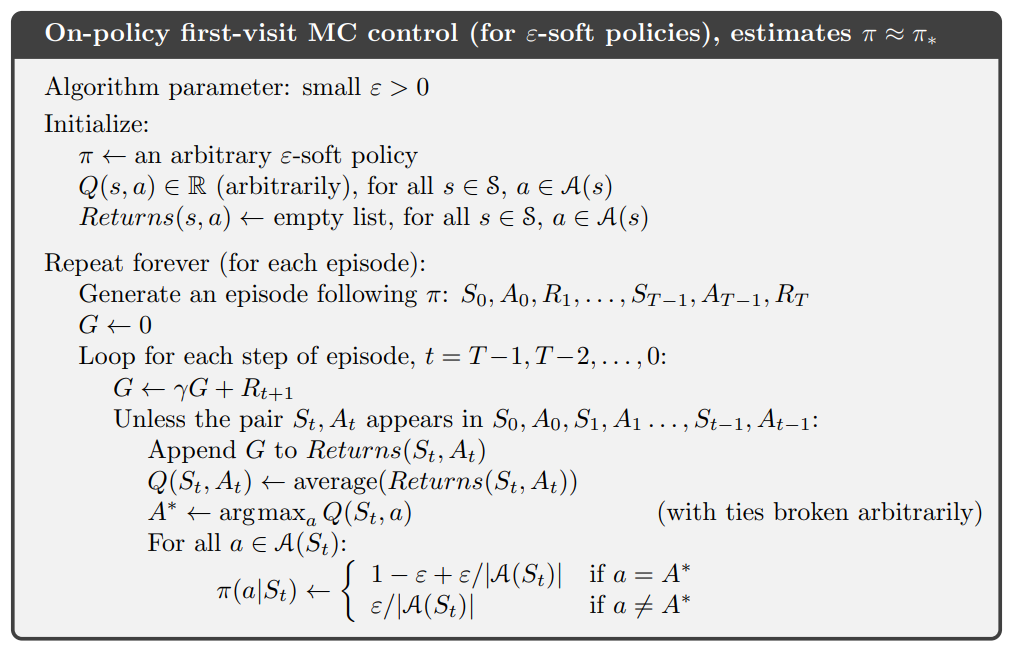